In [1]:
# Face Authentication System Analysis
# This notebook analyzes the face authentication system's performance and visualizes the results.

In [2]:
# Import required libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
from sklearn.metrics import confusion_matrix
import sqlite3
from cryptography.fernet import Fernet
import base64

%matplotlib inline
plt.style.use('default')

In [3]:
def load_encryption_key():
    """Load or generate a proper Fernet encryption key"""
    key_file = 'encryption_key.bin'
    if os.path.exists(key_file):
        with open(key_file, 'rb') as f:
            key = f.read()
            # Verify key is valid base64
            try:
                base64.b64decode(key)
                return key
            except:
                pass  # If key is invalid, generate new one
    
    # Generate new key
    key = base64.b64encode(os.urandom(32))  # Generate 32 random bytes and encode them
    with open(key_file, 'wb') as f:
        f.write(key)
    return key

def encrypt_image(image_data):
    """Encrypt image data using Fernet encryption"""
    key = load_encryption_key()
    f = Fernet(key)
    # Ensure image_data is bytes
    if not isinstance(image_data, bytes):
        image_data = bytes(image_data)
    encrypted_data = f.encrypt(image_data)
    return encrypted_data

def decrypt_image(encrypted_data):
    """Decrypt encrypted image data"""
    key = load_encryption_key()
    f = Fernet(key)
    decrypted_data = f.decrypt(encrypted_data)
    return decrypted_data

class FaceAnalytics:
    def __init__(self, db_path='auth_system.db', images_dir='registered_faces'):
        self.db_path = db_path
        self.images_dir = images_dir
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        
    def get_registered_users(self):
        """Get list of registered users from database"""
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()
        cursor.execute('SELECT user_id FROM users')
        users = cursor.fetchall()
        conn.close()
        return [user[0] for user in users]

    def analyze_face_features(self):
        """Analyze facial features of registered users"""
        users = self.get_registered_users()
        features_data = []
        
        for user_id in users:
            image_path = os.path.join(self.images_dir, f"{user_id}.jpg")
            if os.path.exists(image_path):
                img = cv2.imread(image_path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = self.face_cascade.detectMultiScale(gray, 1.3, 5)
                
                for (x, y, w, h) in faces:
                    face_roi = gray[y:y+h, x:x+w]
                    avg_intensity = np.mean(face_roi)
                    std_intensity = np.std(face_roi)
                    face_size = w * h
                    
                    features_data.append({
                        'user_id': user_id,
                        'face_size': face_size,
                        'avg_intensity': avg_intensity,
                        'std_intensity': std_intensity
                    })
        
        return pd.DataFrame(features_data)

    def create_encrypted_visualization(self, image):
    
        try:
        # Convert image to bytes
            _, img_encoded = cv2.imencode('.jpg', image)
            image_bytes = img_encoded.tobytes()
        
        # Encrypt the image
            encrypted_data = encrypt_image(image_bytes)
        
        # For visualization: convert first part of encrypted bytes to image
            encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)
        
        # Calculate the correct size based on original image
            height, width = image.shape[:2]
            required_size = height * width
        
        # Ensure we have enough data
            if len(encrypted_array) < required_size:
                repeats = (required_size // len(encrypted_array)) + 1
                encrypted_array = np.tile(encrypted_array, repeats)
        
        # Take only what we need and ensure correct type
            encrypted_array = encrypted_array[:required_size] % 256
            encrypted_visualization = encrypted_array.reshape((height, width)).astype(np.uint8)
        
            return encrypted_visualization, encrypted_data
        except Exception as e:
            print(f"Encryption visualization error: {str(e)}")
        # Return a random noise visualization as fallback
            return np.random.randint(0, 256, image.shape[:2], dtype=np.uint8), None

In [4]:
## Initialize Analyzer and Get Registered Users

In [5]:
# Initialize analyzer and get users
analyzer = FaceAnalytics()
users = analyzer.get_registered_users()
print(f"Found {len(users)} registered users: {users}")

Found 19 registered users: ['gox', 'goxx', 'goxxx', 'hello', 'helloo', 'lol', 'lolol', 'sample', 'torq', 'user123', 'user_1736684300', 'user_1736684375', 'user_1736684749', 'user_1736684778', 'user_1737536149', 'user_1737716921', 'user_1737716967', 'user_1737716977', 'user_1738594979']


In [6]:
## Original vs Encrypted Image Analysis


Processing image for user gox...
Image shape: (480, 640, 3)


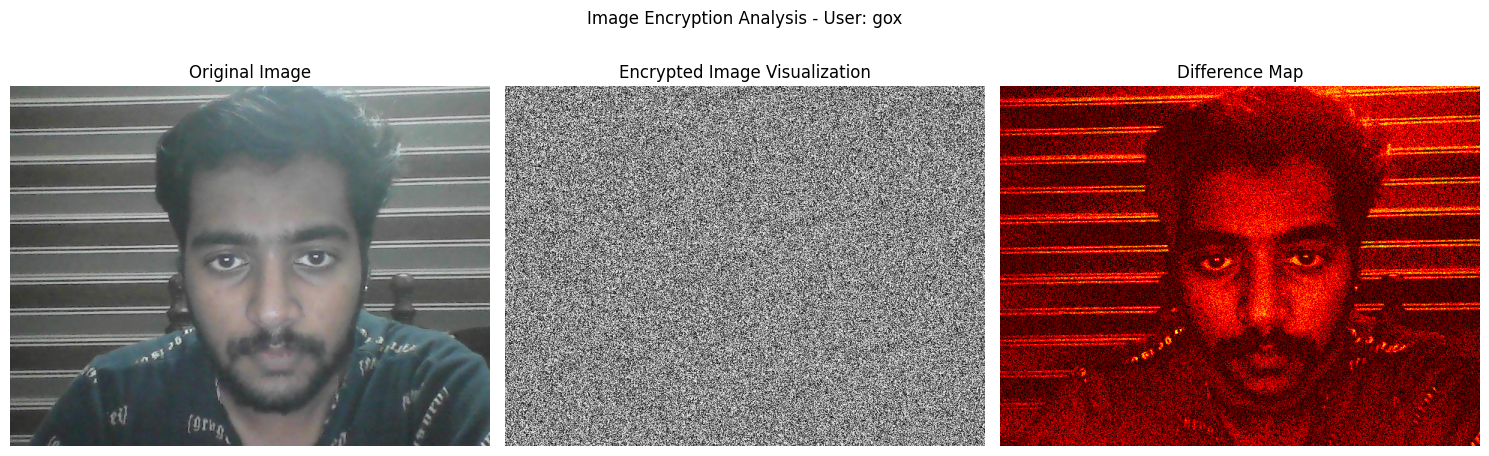

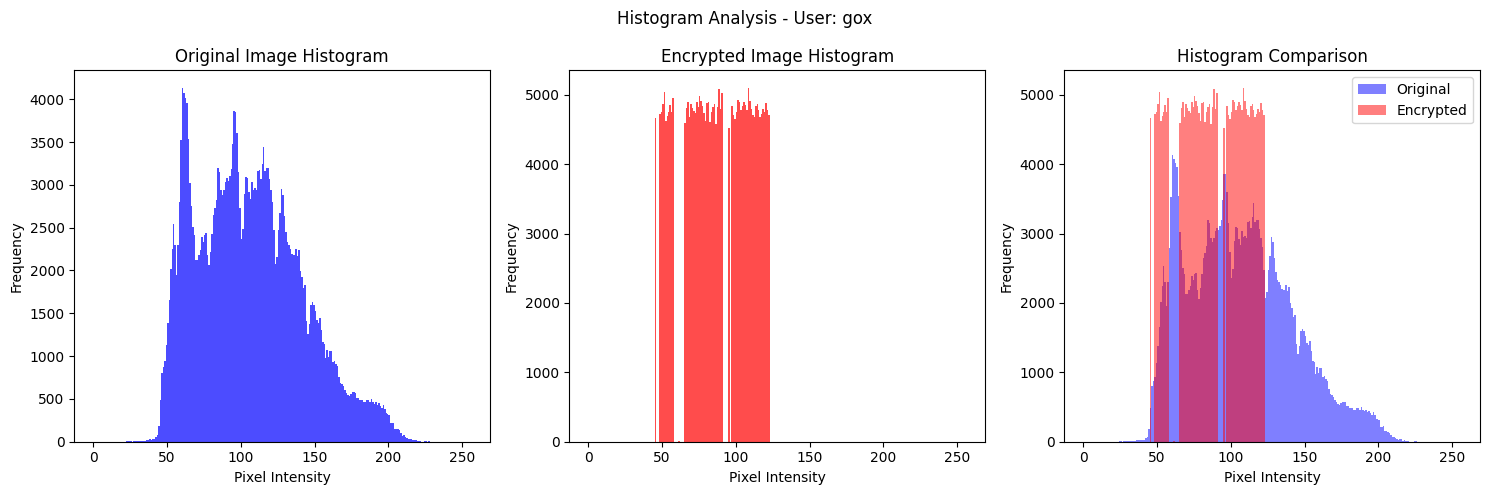


Encryption Statistics for User gox:
Original image size: 81134 bytes
Encrypted data size: 108260 bytes
Encryption ratio: 1.33x
--------------------------------------------------

Processing image for user goxx...
Image shape: (480, 640, 3)


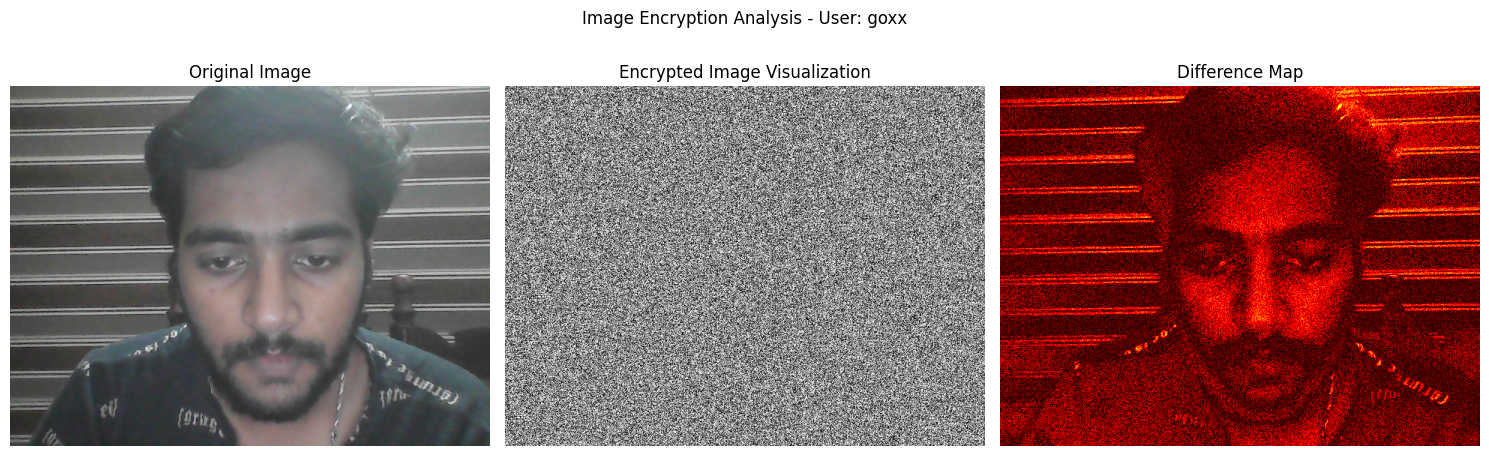

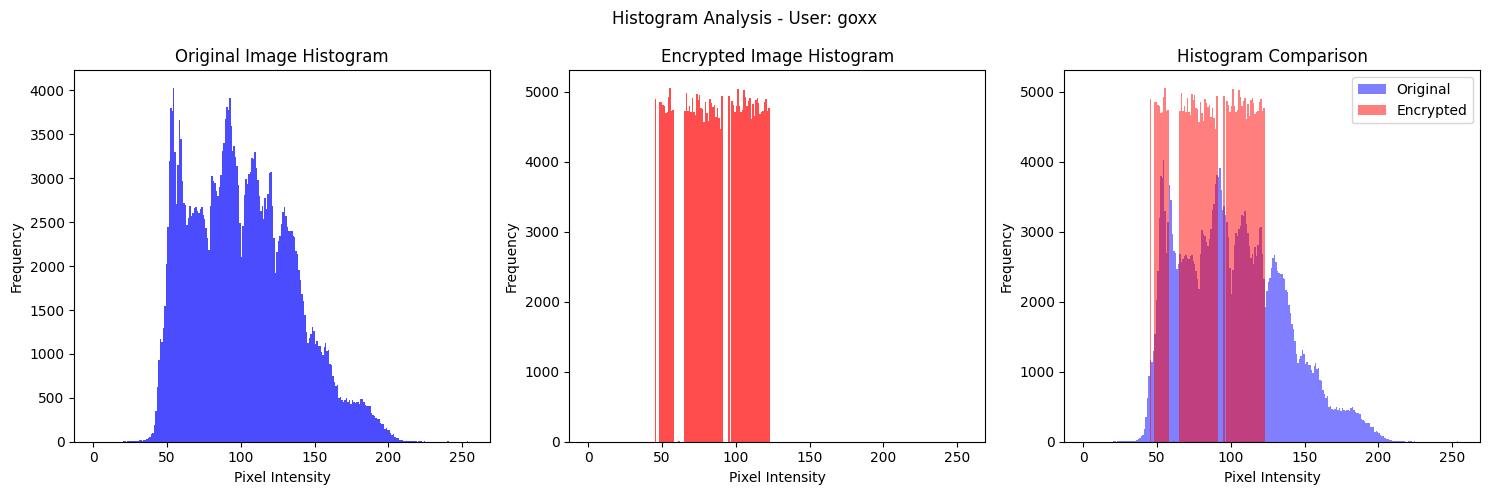


Encryption Statistics for User goxx:
Original image size: 77193 bytes
Encrypted data size: 103012 bytes
Encryption ratio: 1.33x
--------------------------------------------------

Processing image for user goxxx...
Image shape: (480, 640, 3)


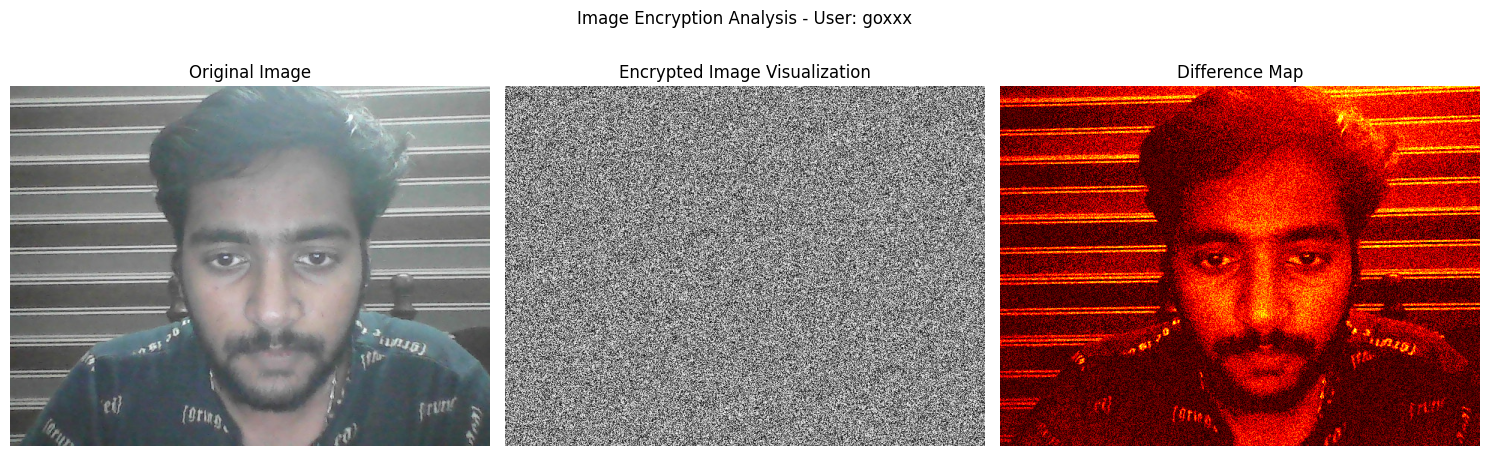

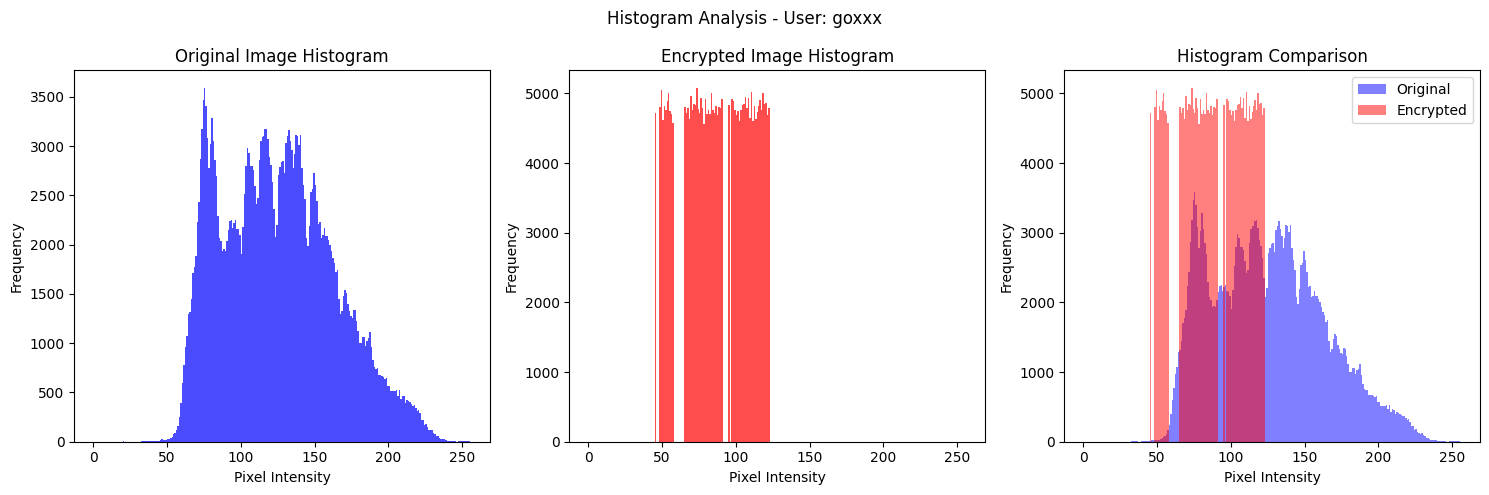


Encryption Statistics for User goxxx:
Original image size: 87484 bytes
Encrypted data size: 116728 bytes
Encryption ratio: 1.33x
--------------------------------------------------

Processing image for user hello...
Image file not found: registered_faces\hello.jpg

Processing image for user helloo...
Image file not found: registered_faces\helloo.jpg

Processing image for user lol...
Image file not found: registered_faces\lol.jpg

Processing image for user lolol...
Image file not found: registered_faces\lolol.jpg

Processing image for user sample...
Image shape: (480, 640, 3)


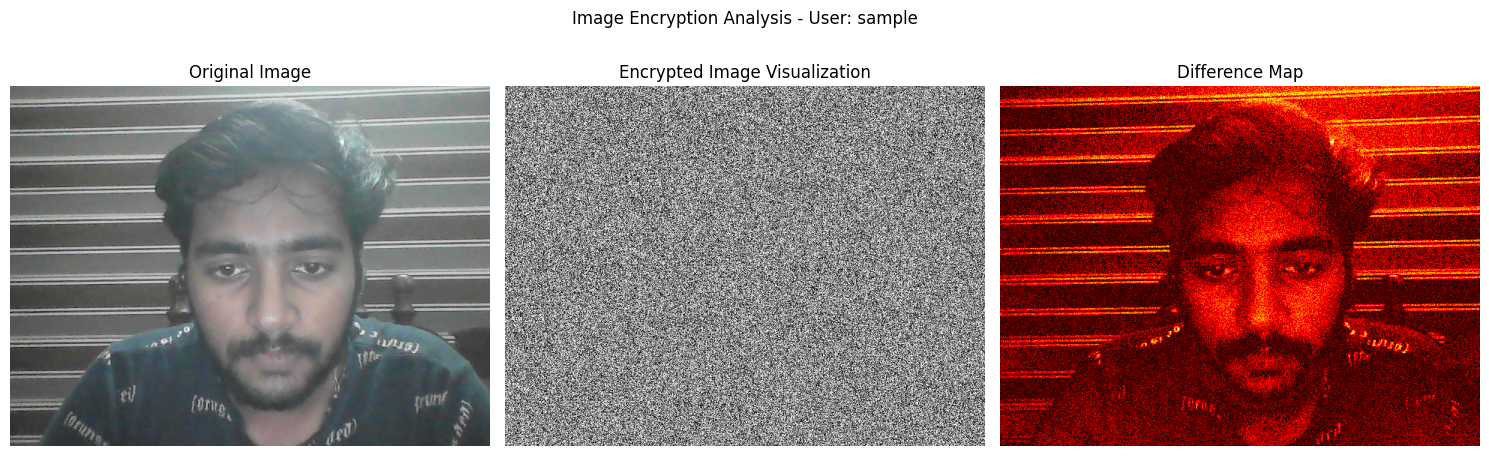

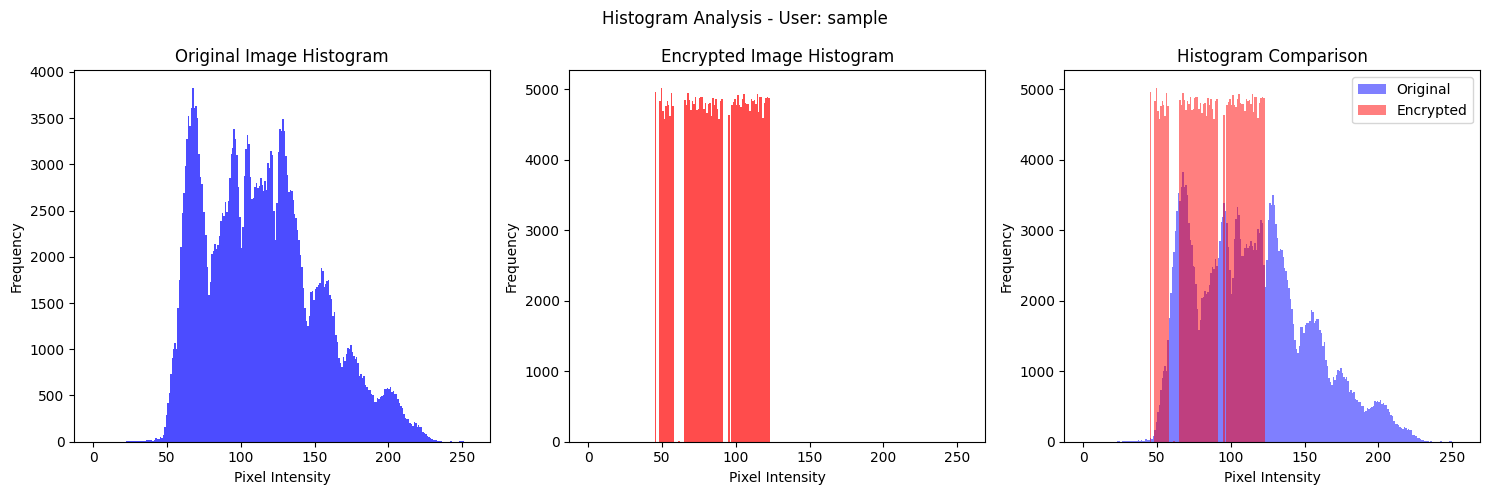


Encryption Statistics for User sample:
Original image size: 86218 bytes
Encrypted data size: 115044 bytes
Encryption ratio: 1.33x
--------------------------------------------------

Processing image for user torq...
Image shape: (480, 640, 3)


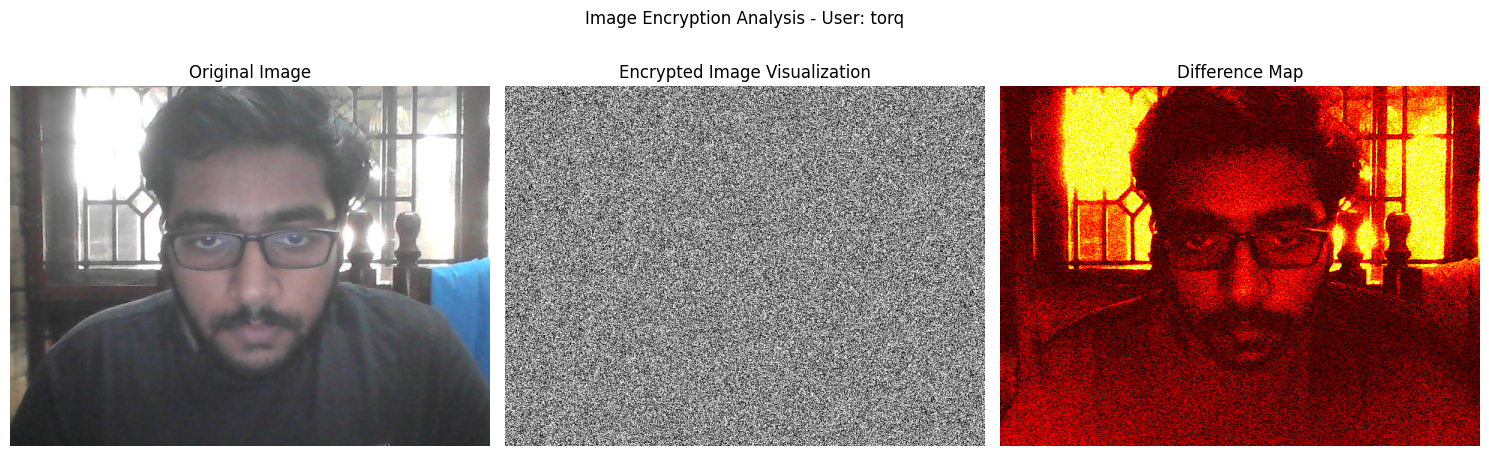

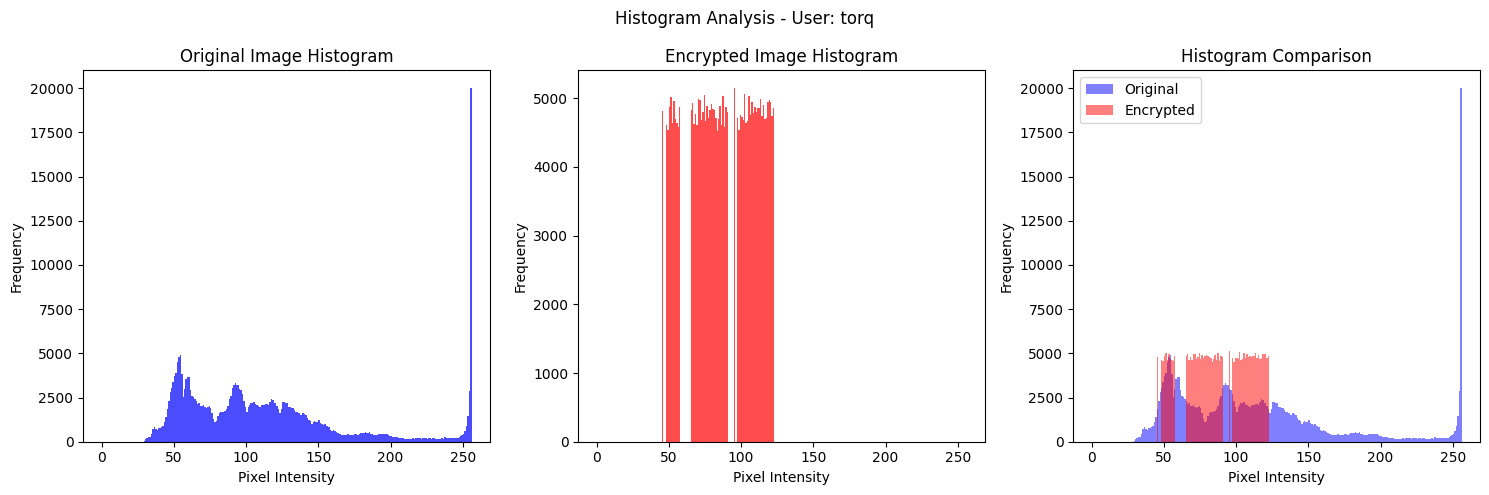


Encryption Statistics for User torq:
Original image size: 68063 bytes
Encrypted data size: 90828 bytes
Encryption ratio: 1.33x
--------------------------------------------------

Processing image for user user123...
Image file not found: registered_faces\user123.jpg

Processing image for user user_1736684300...
Image file not found: registered_faces\user_1736684300.jpg

Processing image for user user_1736684375...
Image file not found: registered_faces\user_1736684375.jpg

Processing image for user user_1736684749...
Image file not found: registered_faces\user_1736684749.jpg

Processing image for user user_1736684778...
Image file not found: registered_faces\user_1736684778.jpg

Processing image for user user_1737536149...
Image file not found: registered_faces\user_1737536149.jpg

Processing image for user user_1737716921...
Image file not found: registered_faces\user_1737716921.jpg

Processing image for user user_1737716967...
Image file not found: registered_faces\user_1737716967.j

In [7]:
# Process each user's image
for user_id in users:
    image_path = os.path.join(analyzer.images_dir, f"{user_id}.jpg")
    print(f"\nProcessing image for user {user_id}...")
    
    if not os.path.exists(image_path):
        print(f"Image file not found: {image_path}")
        continue
        
    try:
        # Read and process images
        original = cv2.imread(image_path)
        if original is None:
            print(f"Failed to read image: {image_path}")
            continue
            
        print(f"Image shape: {original.shape}")
        
        # Convert original to grayscale first
        original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
        
        encrypted_vis, encrypted_data = analyzer.create_encrypted_visualization(original)
        if encrypted_vis is None or encrypted_data is None:
            print(f"Encryption failed for user {user_id}")
            continue
            
        # Ensure both images are uint8
        original_gray = original_gray.astype(np.uint8)
        encrypted_vis = encrypted_vis.astype(np.uint8)
        
        # Create visualization
        plt.figure(figsize=(15, 5))
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        # Encrypted visualization
        plt.subplot(1, 3, 2)
        plt.imshow(encrypted_vis, cmap='gray')
        plt.title('Encrypted Image Visualization')
        plt.axis('off')
        
        # Difference visualization
        diff = cv2.absdiff(original_gray, encrypted_vis)
        plt.subplot(1, 3, 3)
        plt.imshow(diff, cmap='hot')
        plt.title('Difference Map')
        plt.axis('off')
        
        plt.suptitle(f'Image Encryption Analysis - User: {user_id}')
        plt.tight_layout()
        plt.show()
        
        # Histogram analysis
        plt.figure(figsize=(15, 5))
        
        # Original histogram
        plt.subplot(1, 3, 1)
        plt.hist(original_gray.ravel(), 256, [0, 256], color='blue', alpha=0.7)
        plt.title('Original Image Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        
        # Encrypted histogram
        plt.subplot(1, 3, 2)
        plt.hist(encrypted_vis.ravel(), 256, [0, 256], color='red', alpha=0.7)
        plt.title('Encrypted Image Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        
        # Comparison
        plt.subplot(1, 3, 3)
        plt.hist(original_gray.ravel(), 256, [0, 256], color='blue', alpha=0.5, label='Original')
        plt.hist(encrypted_vis.ravel(), 256, [0, 256], color='red', alpha=0.5, label='Encrypted')
        plt.title('Histogram Comparison')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.legend()
        
        plt.suptitle(f'Histogram Analysis - User: {user_id}')
        plt.tight_layout()
        plt.show()

        # Print encryption statistics
        _, img_encoded = cv2.imencode('.jpg', original)
        image_bytes = img_encoded.tobytes()
        print(f"\nEncryption Statistics for User {user_id}:")
        print(f"Original image size: {len(image_bytes)} bytes")
        print(f"Encrypted data size: {len(encrypted_data)} bytes")
        print(f"Encryption ratio: {len(encrypted_data)/len(image_bytes):.2f}x")
        print("-" * 50)
        
    except Exception as e:
        print(f"Error processing user {user_id}:")
        print(f"Error type: {type(e).__name__}")
        print(f"Error message: {str(e)}")
        print(f"Image path: {image_path}")
        continue

In [8]:
## Statistical Summary

In [10]:
import time

def measure_encryption_time(image_path):
    """Measure the time taken for encryption and decryption."""
    img = cv2.imread(image_path)
    _, img_encoded = cv2.imencode('.jpg', img)
    image_bytes = img_encoded.tobytes()

    start_time = time.time()
    encrypted_data = encrypt_image(image_bytes)
    encryption_time = time.time() - start_time

    start_time = time.time()
    decrypted_data = decrypt_image(encrypted_data)
    decryption_time = time.time() - start_time

    print(f"Encryption Time: {encryption_time:.6f} seconds")
    print(f"Decryption Time: {decryption_time:.6f} seconds")

# Example Usage
test_image_path = "registered_faces/gox.jpg"  # Replace with a real image path
measure_encryption_time(test_image_path)


Encryption Time: 0.001003 seconds
Decryption Time: 0.000998 seconds


In [11]:
from deepface import DeepFace

def compute_face_similarity(img1_path, img2_path):
    """Compute similarity between two face images using DeepFace."""
    try:
        result = DeepFace.verify(img1_path, img2_path, model_name="VGG-Face")
        similarity_score = result["distance"]
        print(f"Face Similarity Score: {similarity_score:.4f}")
    except Exception as e:
        print(f"Error in face similarity computation: {str(e)}")

# Example Usage
registered_face = "registered_faces/gox.jpg"
new_face = "registered_faces/sample.jpg"  # Replace with an actual captured face image
compute_face_similarity(registered_face, new_face)



Face Similarity Score: 0.1690


In [12]:
import cv2
import time

# Load Haar Cascade Classifier
face_cascade = cv2.CascadeClassifier(r"C:\Users\goxth\AppData\Local\packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cv2\data\haarcascade_frontalface_default.xml")

def detect_face(image):
    start_time = time.time()  # Start time
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    end_time = time.time()  # End time
    
    processing_time = (end_time - start_time) * 1000  # Convert to milliseconds
    return faces, processing_time

# Load test image
image = cv2.imread(r'C:\Users\goxth\Documents\COLLEGE WORKS\FINAL YEAR PROJECT\BioCrypt-Auth\registered_faces\gox.jpg')
faces, processing_time = detect_face(image)

print(f"Processing Time: {processing_time:.2f} ms")


Processing Time: 9.52 ms


In [ ]:
'''brute force attack analysis'
'

In [13]:
import cv2

print(cv2.data.haarcascades)


C:\Users\goxth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cv2\data\
